# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count and save length for data retrieval
length=len(cities)
length

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Set up query url and empty lists

url = "http://api.openweathermap.org/data/2.5/weather?"
temp=[]
wind=[]
clouds=[]
hum=[]
lon=[]
lat=[]
name=[]
dt=[]
country=[]

# Run data retrieval with successive API calls

print(f'Beginning Data Retrieval')
print(f'-----------------------------')
i=1
for city in cities: 
    try:
        query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
        weather_json = requests.get(query_url).json()
        temp.append(weather_json['main']['temp_max'])
        wind.append(weather_json['wind']['speed'])
        hum.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        lon.append(weather_json['coord']['lon'])
        lat.append(weather_json['coord']['lat'])
        name.append(weather_json['name'])
        dt.append(weather_json['dt'])
        country.append(weather_json['sys']['country'])
        print(f'Processing record {i} of {length} | {city}')
    except:
        print(f'City not found. Skipping record {i}...')
    i+=1
    
print(f'-----------------------------')
print(f'Data Retrieval Complete')
print(f'-----------------------------')


Beginning Data Retrieval
-----------------------------
City not found. Skipping record 1...
Processing record 2 of 591 | dikson
Processing record 3 of 591 | joniskis
Processing record 4 of 591 | houma
Processing record 5 of 591 | pacific grove
Processing record 6 of 591 | busselton
Processing record 7 of 591 | kindersley
Processing record 8 of 591 | vaini
Processing record 9 of 591 | russell
Processing record 10 of 591 | rikitea
Processing record 11 of 591 | constitucion
Processing record 12 of 591 | vuktyl
Processing record 13 of 591 | severo-kurilsk
Processing record 14 of 591 | saint george
Processing record 15 of 591 | puerto ayora
Processing record 16 of 591 | cidreira
Processing record 17 of 591 | inhambane
Processing record 18 of 591 | airai
City not found. Skipping record 19...
Processing record 20 of 591 | hermanus
Processing record 21 of 591 | mataura
City not found. Skipping record 22...
Processing record 23 of 591 | melilla
Processing record 24 of 591 | shimoda
Processing r

Processing record 206 of 591 | bonavista
Processing record 207 of 591 | tarko-sale
Processing record 208 of 591 | oudtshoorn
Processing record 209 of 591 | tual
Processing record 210 of 591 | la huaca
Processing record 211 of 591 | nur
Processing record 212 of 591 | erzin
Processing record 213 of 591 | baijiantan
Processing record 214 of 591 | zurrieq
Processing record 215 of 591 | gilbues
Processing record 216 of 591 | camrose
Processing record 217 of 591 | east london
City not found. Skipping record 218...
Processing record 219 of 591 | aromashevo
Processing record 220 of 591 | sao borja
Processing record 221 of 591 | carnarvon
Processing record 222 of 591 | honningsvag
Processing record 223 of 591 | kalachinsk
Processing record 224 of 591 | linhares
City not found. Skipping record 225...
City not found. Skipping record 226...
City not found. Skipping record 227...
City not found. Skipping record 228...
Processing record 229 of 591 | rujewa
City not found. Skipping record 230...
City

Processing record 410 of 591 | lagoa
Processing record 411 of 591 | sisimiut
Processing record 412 of 591 | zhigansk
Processing record 413 of 591 | portland
Processing record 414 of 591 | port lincoln
Processing record 415 of 591 | namibe
Processing record 416 of 591 | vao
Processing record 417 of 591 | kisangani
Processing record 418 of 591 | kirkuk
Processing record 419 of 591 | dubai
Processing record 420 of 591 | ust-tsilma
Processing record 421 of 591 | riyadh
Processing record 422 of 591 | ariquemes
Processing record 423 of 591 | siyabuswa
Processing record 424 of 591 | shediac
City not found. Skipping record 425...
Processing record 426 of 591 | hasaki
Processing record 427 of 591 | ekibastuz
Processing record 428 of 591 | zaraza
Processing record 429 of 591 | mudanya
Processing record 430 of 591 | khuzhir
Processing record 431 of 591 | tokur
Processing record 432 of 591 | oksfjord
Processing record 433 of 591 | sibolga
Processing record 434 of 591 | epe
Processing record 435 of

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Create a DataFrame

weather_dict = {
    "City": name,
    "Cloudiness": clouds,
    "Country": country,
    "Date": dt,
    "Humidity": hum,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp,
    "Wind Speed": wind
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Dikson,48,RU,1546882733,91,73.51,80.55,-4.27,15.21
1,Joniskis,90,LT,1546879800,100,56.24,23.62,23.00,14.99
2,Houma,24,CN,1546882734,82,35.63,111.36,13.19,2.35
3,Pacific Grove,20,US,1546881600,82,36.62,-121.92,53.06,5.14
4,Busselton,0,AU,1546882734,100,-33.64,115.35,62.69,23.26


In [7]:
# Export to csv
weather_data.to_csv("City_Weather_Data.csv", index=False, header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

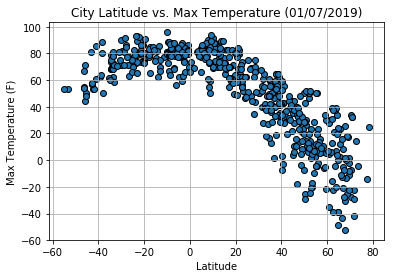

In [8]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("CityLatitudevsMaxTemperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

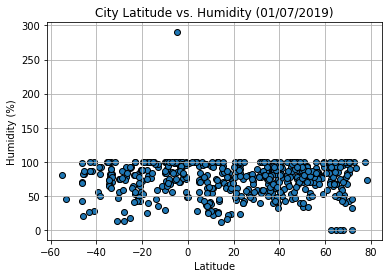

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("CityLatitudevsHumidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

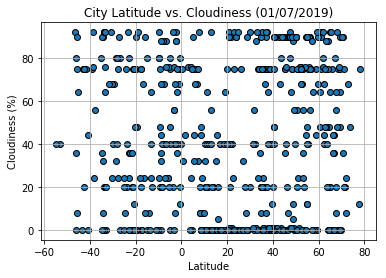

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("CityLatitudevsCloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

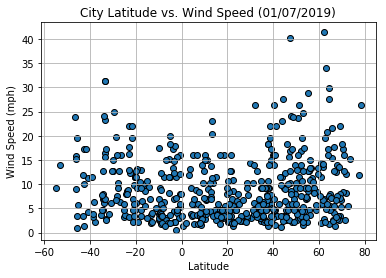

In [11]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o",edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (" + time.strftime("%m/%d/%Y", time.gmtime())+ ")")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
#plt.savefig("CityLatitudevsWindSpeed.png")

# Show plot
plt.show()